In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

comp = pd.read_csv('../data/COMPUSTAT_vars.csv')
comp_full5 = pd.read_csv('../data/COMPUSTAT_full5.csv')
comp_full10 = pd.read_csv('../data/COMPUSTAT_full10.csv')
comp_full15 = pd.read_csv('../data/COMPUSTAT_full15.csv')
comp_full20 = pd.read_csv('../data/COMPUSTAT_full20.csv')

In [184]:
def plot_breach_periods(var, xlim_min=-8, xlim_max=8):    
    fig, ax = plt.subplots()

    comp.groupby(by='quarters_since_breach').agg('mean')[var].plot(ax=ax)
    comp_full5.groupby(by='quarters_since_breach').agg('mean')[var].plot(ax=ax)
    comp_full10.groupby(by='quarters_since_breach').agg('mean')[var].plot(ax=ax)
    comp_full15.groupby(by='quarters_since_breach').agg('mean')[var].plot(ax=ax)
    comp_full20.groupby(by='quarters_since_breach').agg('mean')[var].plot(ax=ax)

    ax.legend([f'n: {len(comp[["gvkey", "Date.Made.Public"]].drop_duplicates())}',
               f'n: {len(comp_full5[["gvkey", "Date.Made.Public"]].drop_duplicates())}', 
               f'n: {len(comp_full10[["gvkey", "Date.Made.Public"]].drop_duplicates())}',
               f'n: {len(comp_full15[["gvkey", "Date.Made.Public"]].drop_duplicates())}',
               f'n: {len(comp_full20[["gvkey", "Date.Made.Public"]].drop_duplicates())}'])

    ax.axvline(0, color = 'black')
    ax.axhline(0, color = 'black')
    ax.set_xlim(xlim_min, xlim_max)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
               
    return ax

In [196]:
def plot_breach_vars(vars, xlim_min=-8, xlim_max=8):
    fig, ax = plt.subplots()
    for var in vars:
        comp.groupby(by='quarters_since_breach').agg('mean')[var].plot(ax=ax)
    
    ax.axvline(0, color = 'black')
    ax.axhline(0, color = 'black')
    ax.set_xlim(xlim_min, xlim_max)
    ax.legend()
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
               
    return ax

In [202]:
def plot_breach_metrics(var, xlim_min=-40, xlim_max=40):
    fig, ax = plt.subplots()
    comp.groupby(by='quarters_since_breach').agg('mean')[var].plot(ax=ax)
    comp.groupby(by='quarters_since_breach').agg('median')[var].plot(ax=ax)
       
    ax.axvline(0, color = 'black')
    ax.axhline(0, color = 'black')
    ax.set_xlim(xlim_min, xlim_max)
    ax.legend(['mean', 'median'])
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
               
    return ax

In [347]:
breaches = comp[['gvkey', 'breachdate']].drop_duplicates()
breaches = pd.merge(breaches, comp, on=['gvkey', 'breachdate'], how='left')

In [364]:
plt.style.use('ggplot')
def plot_new_mean(outcome, ylab='Outcome'):
    def new_mean(x):
        _temp_breaches = breaches[breaches['gvkey'].isin(x['gvkey'].unique())][['gvkey', 'breachdate']].drop_duplicates()
        _temp_outcomes = breaches[breaches['gvkey'].isin(x['gvkey'].unique())]
        npoints = len(_temp_breaches)
        spoints = sum(_temp_outcomes[outcome].dropna())
        return spoints/npoints

    fig, ax = plt.subplots()
    to_plot = comp.groupby(by='quarters_since_breach').apply(new_mean).to_frame().reset_index()
    to_plot.columns = ['quarters_since_breach', 'outcome']
    to_plot.plot(kind='scatter', x='quarters_since_breach', y='outcome', ax=ax)

    ax.axvline(0, color = 'black')
    ax.axhline(0, color = 'black')
    ax.set_xlim(-40, 40)
    ax.set_ylim(-to_plot['outcome'].std()+to_plot['outcome'].mean(),to_plot['outcome'].std()+to_plot['outcome'].mean())
    ax.set_ylabel(ylab)
    ax.set_xlabel('Quarters Since Breach')
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

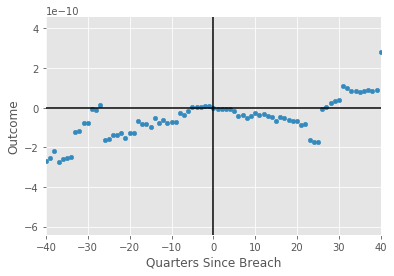

In [365]:
plot_new_mean('resid_pr_nott')

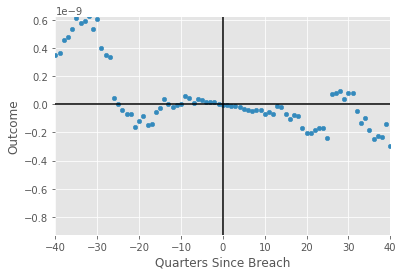

In [366]:
plot_new_mean('resid_rev_nott')

No handles with labels found to put in legend.


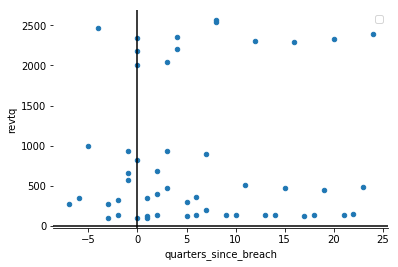

In [218]:
fig, ax = plt.subplots()
companies = [1013,  2005,   2019,   2269,   2968,   3082,   3238,   3643,
         4640,   4674,   4678,   4685,   4699,   4739,   5568,   5643,
         5786,   7647,   7982,   8007,   8245,   9783,  10035,  10187,
        10726,  11856,  11861,  12976,  14275,  15199,  15509,  15545,
        15617,  15782,  15855,  16116,  16245,  16384,  16784,  17934,
        18498,  18683,  19873,  20067,  22306,  23107,  23821,  24481,
        24905,  26156,  26272,  30188,  60923,  64336, 110250, 111537,
       111662, 111819, 114524, 125054, 139662, 141913, 153769, 161989,
       165993, 175607, 176928, 176939, 178012, 179027, 179534, 180405,
       184167, 184180, 184498, 185419, 186342, 187462, 187969, 188856,
       189860, 197559]
subset = comp[comp['gvkey'] == companies[3]]

subset.groupby(by='gvkey').plot(kind='scatter', x='quarters_since_breach', y='revtq', ax=ax)
ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')
#ax.set_xlim(-40, 40)
ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

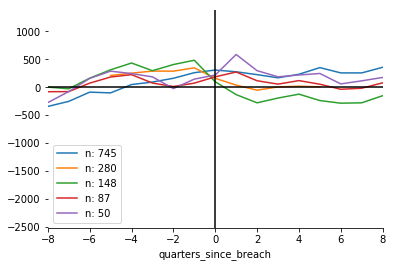

In [192]:
plot_breach_periods('resid_rev_nott')

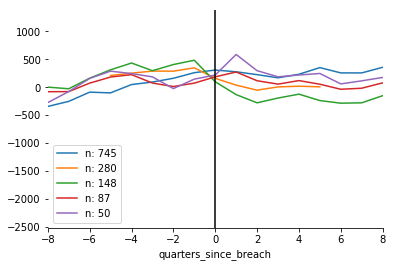

In [173]:
plot_breach_periods('resid_rev_nott')

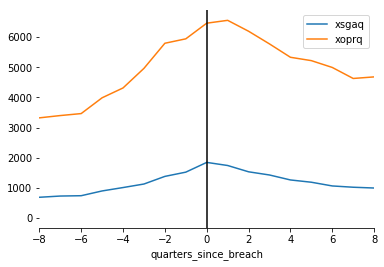

In [175]:
to_plot = ['xsgaq', 'xoprq']
plot_breach_vars(to_plot)